### Table of Contents
#### Data information
#### Maps

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings
import folium 
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap
from folium.features import GeoJsonPopup, GeoJsonTooltip
import json
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import requests

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# Ensure the graphs are displayed in notebook
%matplotlib inline

In [3]:
import sys
sys.executable

'C:\\Users\\sandu\\Anaconda3\\python.exe'

In [4]:
import sys
sys.prefix

'C:\\Users\\sandu\\Anaconda3'

In [5]:
# Define path
path = r'C:\Users\sandu\Desktop\WorldHappinessReport\Data\Prepared Data'
path1 =r'C:\Users\sandu\Desktop\WorldHappinessReport\Visualizations'

In [89]:
# Import data
df = pd.read_csv(os.path.join(path,'2015-2023Last.csv'), index_col = False)
df.head()

Unnamed: 0      Country                 Region  Happiness Score  \
0           0  Switzerland         Western Europe            7.587   
1           1      Iceland         Western Europe            7.561   
2           2      Denmark         Western Europe            7.527   
3           3       Norway         Western Europe            7.522   
4           4       Canada  North America and ANZ            7.427   

   Economy (Capital GDP)  Family(Social Support)  Health(Life Expectancy)  \
0                1.39651                 1.34951                  0.94143   
1                1.30232                 1.40223                  0.94784   
2                1.32548                 1.36058                  0.87464   
3                1.45900                 1.33095                  0.88521   
4                1.32629                 1.32261                  0.90563   

   Freedom(Life Choices)  Generosity(Donations)  Trust(Gouverment Corruption)  \
0                0.66557                0.29678                       0.41978   
1                0.62877                0.43630                       0.14145   
2                0.64938                0.34139                       0.48357   
3                0.66973                0.34699                       0.36503   
4                0.63297                0.45811                       0.32957   

   Year  Happiness Rank  Average Happiness Score Happiness Category  \
0  2015               1                 7.493322              Happy   
1  2015               2                 7.522278              Happy   
2  2015               3                 7.579733              Happy   
3  2015               4                 7.473889              Happy   
4  2015               5                 7.230456              Happy   

  Trust Category (Gouverment Corruption)  Trust Average  Freedom Average  
0                             High Trust       0.406196         0.637796  
1                           Medium Trust       0.154807         0.656239  
2                             High Trust       0.464903         0.659315  
3                           Medium Trust       0.390873         0.671494  
4                           Medium Trust       0.327548         0.629089

In [7]:
# Import ".json" file for the world map 
country_geo = r'C:\Users\sandu\Desktop\WorldHappinessReport\Data\Original Data/world-countries.json'

In [8]:
# Check the JSON file contents

f = open(r'C:\Users\sandu\Desktop\WorldHappinessReport\Data\Original Data/world-countries.json')
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [90]:
# Drop coulumn 'Unnamed: 0'
df = df.drop(columns = ['Unnamed: 0'])

In [91]:
# Check nr of rows and columns
df.shape

(1366, 16)

In [92]:
# Check for missing values
df.isnull().sum()

Country                                   0
Region                                    0
Happiness Score                           0
Economy (Capital GDP)                     0
Family(Social Support)                    0
Health(Life Expectancy)                   0
Freedom(Life Choices)                     0
Generosity(Donations)                     0
Trust(Gouverment Corruption)              0
Year                                      0
Happiness Rank                            0
Average Happiness Score                   0
Happiness Category                        0
Trust Category (Gouverment Corruption)    0
Trust Average                             0
Freedom Average                           0
dtype: int64

In [93]:
# Check column names 
df.columns

Index(['Country', 'Region', 'Happiness Score', 'Economy (Capital GDP)',
       'Family(Social Support)', 'Health(Life Expectancy)',
       'Freedom(Life Choices)', 'Generosity(Donations)',
       'Trust(Gouverment Corruption)', 'Year', 'Happiness Rank',
       'Average Happiness Score', 'Happiness Category',
       'Trust Category (Gouverment Corruption)', 'Trust Average',
       'Freedom Average'],
      dtype='object')

### Which region ranks highest, and conversely, which region ranks lowest?

In [96]:
#Make a subset of data including countries which were counted in 9 all years

# Calculate the counts of each country
country_counts = df['Country'].value_counts()

# Filter rows where the count is 8
filter_whr = df[df['Country'].isin(country_counts[country_counts == 9].index)]

**Regions**

In [97]:
#Find the mean of Happiness Score from all regions participated -> Bottom Regions
filter_whr.groupby('Region')['Happiness Score'].mean().sort_values(ascending=True)

Region
Sub-Saharan Africa                    4.353918
South Asia                            4.386102
Middle East and North Africa          5.392850
Southeast Asia                        5.420746
Central and Eastern Europe            5.544432
Commonwealth of Independent States    5.681881
East Asia                             5.732150
Latin America and Caribbean           6.068098
Western Europe                        6.911053
North America and ANZ                 7.176058
Name: Happiness Score, dtype: float64

In [98]:
#Find the mean of Happiness Score from all regions participated -> Top Regions
filter_whr.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)

Region
North America and ANZ                 7.176058
Western Europe                        6.911053
Latin America and Caribbean           6.068098
East Asia                             5.732150
Commonwealth of Independent States    5.681881
Central and Eastern Europe            5.544432
Southeast Asia                        5.420746
Middle East and North Africa          5.392850
South Asia                            4.386102
Sub-Saharan Africa                    4.353918
Name: Happiness Score, dtype: float64

In [146]:
df.head(2)

Country          Region  Happiness Score  Economy (Capital GDP)  \
0  Switzerland  Western Europe            7.587                1.39651   
1      Iceland  Western Europe            7.561                1.30232   

   Family(Social Support)  Health(Life Expectancy)  Freedom(Life Choices)  \
0                 1.34951                  0.94143                0.66557   
1                 1.40223                  0.94784                0.62877   

   Generosity(Donations)  Trust(Gouverment Corruption)  Year  Happiness Rank  \
0                0.29678                       0.41978  2015               1   
1                0.43630                       0.14145  2015               2   

   Average Happiness Score Happiness Category  \
0                 7.493322              Happy   
1                 7.522278              Happy   

  Trust Category (Gouverment Corruption)  Trust Average  Freedom Average  
0                             High Trust       0.406196         0.637796  
1                           Medium Trust       0.154807         0.656239

Region
Sub-Saharan Africa                    24.7%
Central and Eastern Europe            15.7%
Latin America and Caribbean           13.9%
Western Europe                        13.8%
Middle East and North Africa          11.7%
Southeast Asia                         5.9%
South Asia                             4.5%
East Asia                              4.0%
Commonwealth of Independent States     3.2%
North America and ANZ                  2.6%
Africa                                 0.1%
Name: proportion, dtype: object

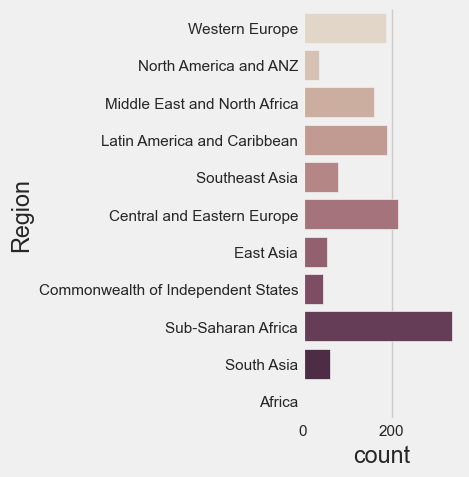

In [174]:
s = df["Region"].value_counts(-1)
display(s.map(lambda x: str(round(x*100,1))+"%"))

sns.catplot(y="Region", kind="count", palette="ch:.25", data=df)

NOTE:  
As we can see, the `Regions` the most represented in the dataset are Sub-Saharan Afric (22.0%) and  Central and Eastern Europe: (19.9%).  
Like Australia & New Zealand, North America represent less than 2% of the dataset countries but there is no surprise since they only contain United States and Canada.

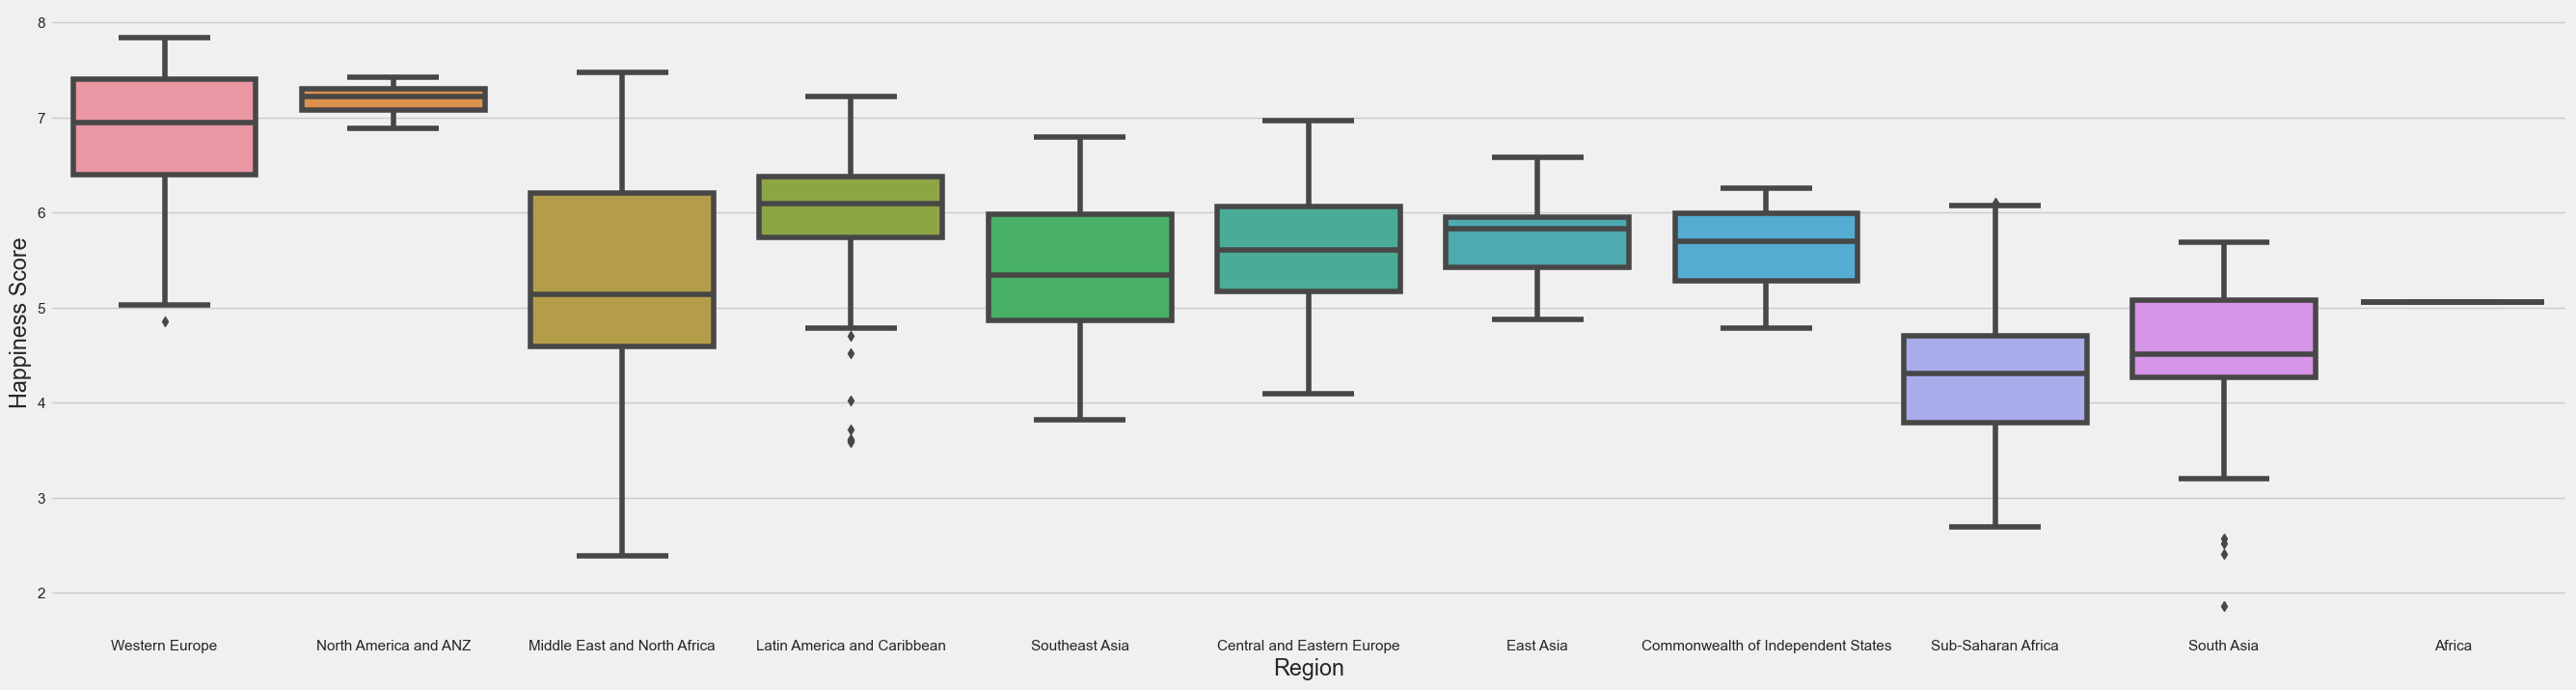

In [171]:
plt.figure(figsize=(30,8))
sns.boxplot(x="Region", y="Happiness Score", data=df, dodge=True)
plt.savefig('boxplotRegion.png')

Overall, the `happiest` countries correspond to North america, Australia & New-zealand and Western Europe.
The `least happy` countries seems to concern Southern Asia and Sub-Saharian Africa.

**Countries**

In [99]:
#Find the mean of Happiness Score from all countries participated -> Bottom Countries
filter_whr.groupby('Country')['Happiness Score'].mean().sort_values(ascending=True)

Country
Afghanistan    2.990767
Tanzania       3.536133
Zimbabwe       3.630689
Botswana       3.666878
Malawi         3.755333
                 ...   
Norway         7.473889
Switzerland    7.493322
Iceland        7.522278
Denmark        7.579733
Finland        7.662744
Name: Happiness Score, Length: 126, dtype: float64

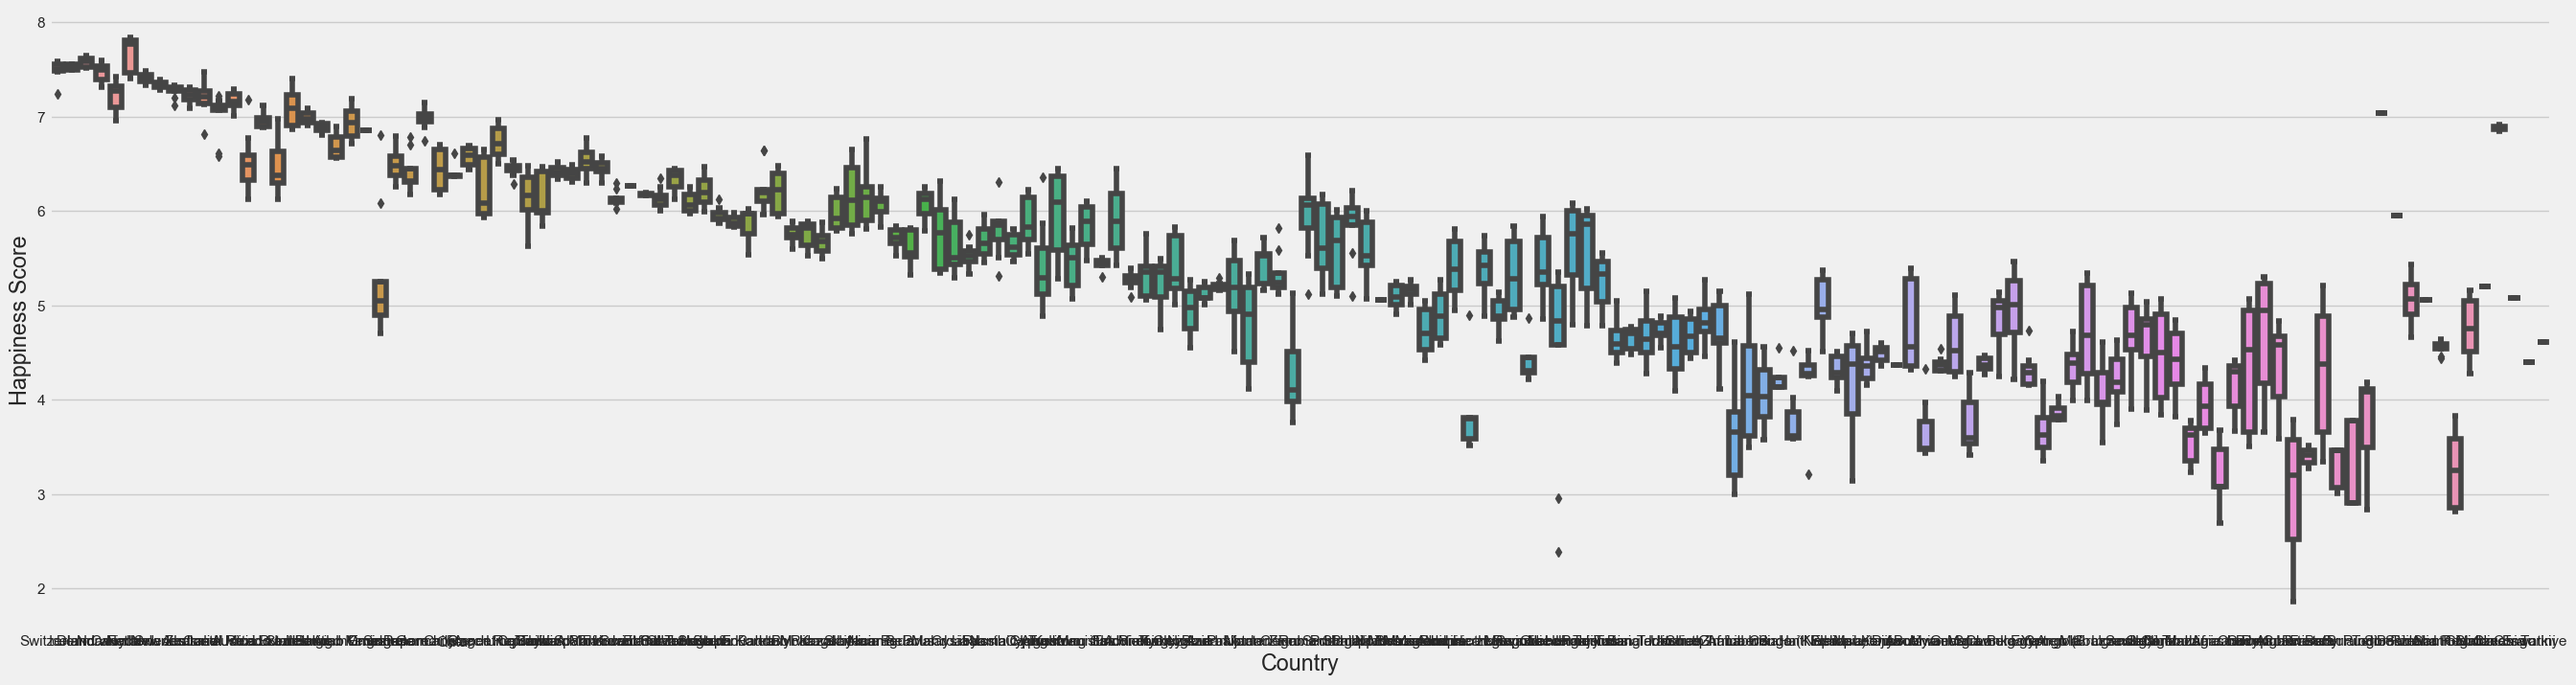

In [172]:
plt.figure(figsize=(30,8))
sns.boxplot(x="Country", y="Happiness Score", data=df, dodge=True)
plt.savefig('boxplotCountry.png')

In [100]:
#Find the mean of Happiness Score from all countries participated -> Top Countries
filter_whr.groupby('Country')['Happiness Score'].mean().sort_values(ascending=False)

Country
Finland        7.662744
Denmark        7.579733
Iceland        7.522278
Switzerland    7.493322
Norway         7.473889
                 ...   
Malawi         3.755333
Botswana       3.666878
Zimbabwe       3.630689
Tanzania       3.536133
Afghanistan    2.990767
Name: Happiness Score, Length: 126, dtype: float64

Based on the mean 'Rank' from data the 'Happiness Score' based on the region/country is as follows:  

**Top 3 Happiness Region**
1. North America and ANZ	  
2. Western Europe	
3. Latin America and Caribbean

**Top 3 Least Happiness Region**
1. Middle East and North Africa
1. South Asia
1. Sub-Saharan Africa

-----------------
**Top 5 Happy Countries**
1. Finland  
2. Denmark  
3. Iceland  
4. Switzerland  
5. Norway  

**Top 5 Least Happy Countries**
1. Afghanistan  
2. Tanzania  
3. Zimbabwe  
4. Botswana  
5. Malawi

In [41]:
# Goverment Corruption_
df.loc[df['Trust(Gouverment Corruption)'] < 0.09, 'Trust(Gouverment Corruption)'] = 'Low Trust'
df.loc[(df['Trust(Gouverment Corruption)'] >= 0.09) & (df['Trust(Gouverment Corruption)'] < 0.4), 'Trust(Gouverment Corruption)'] = 'Medium Trust'
df.loc[df['Trust(Gouverment Corruption)'] >= 0.4, 'Trust(Gouverment Corruption)'] = 'High Trust'

In [102]:
#count of Trust Category
df['Trust Category (Gouverment Corruption)'].value_counts()

Trust Category (Gouverment Corruption)
Medium Trust    664
Low Trust       641
High Trust       61
Name: count, dtype: int64

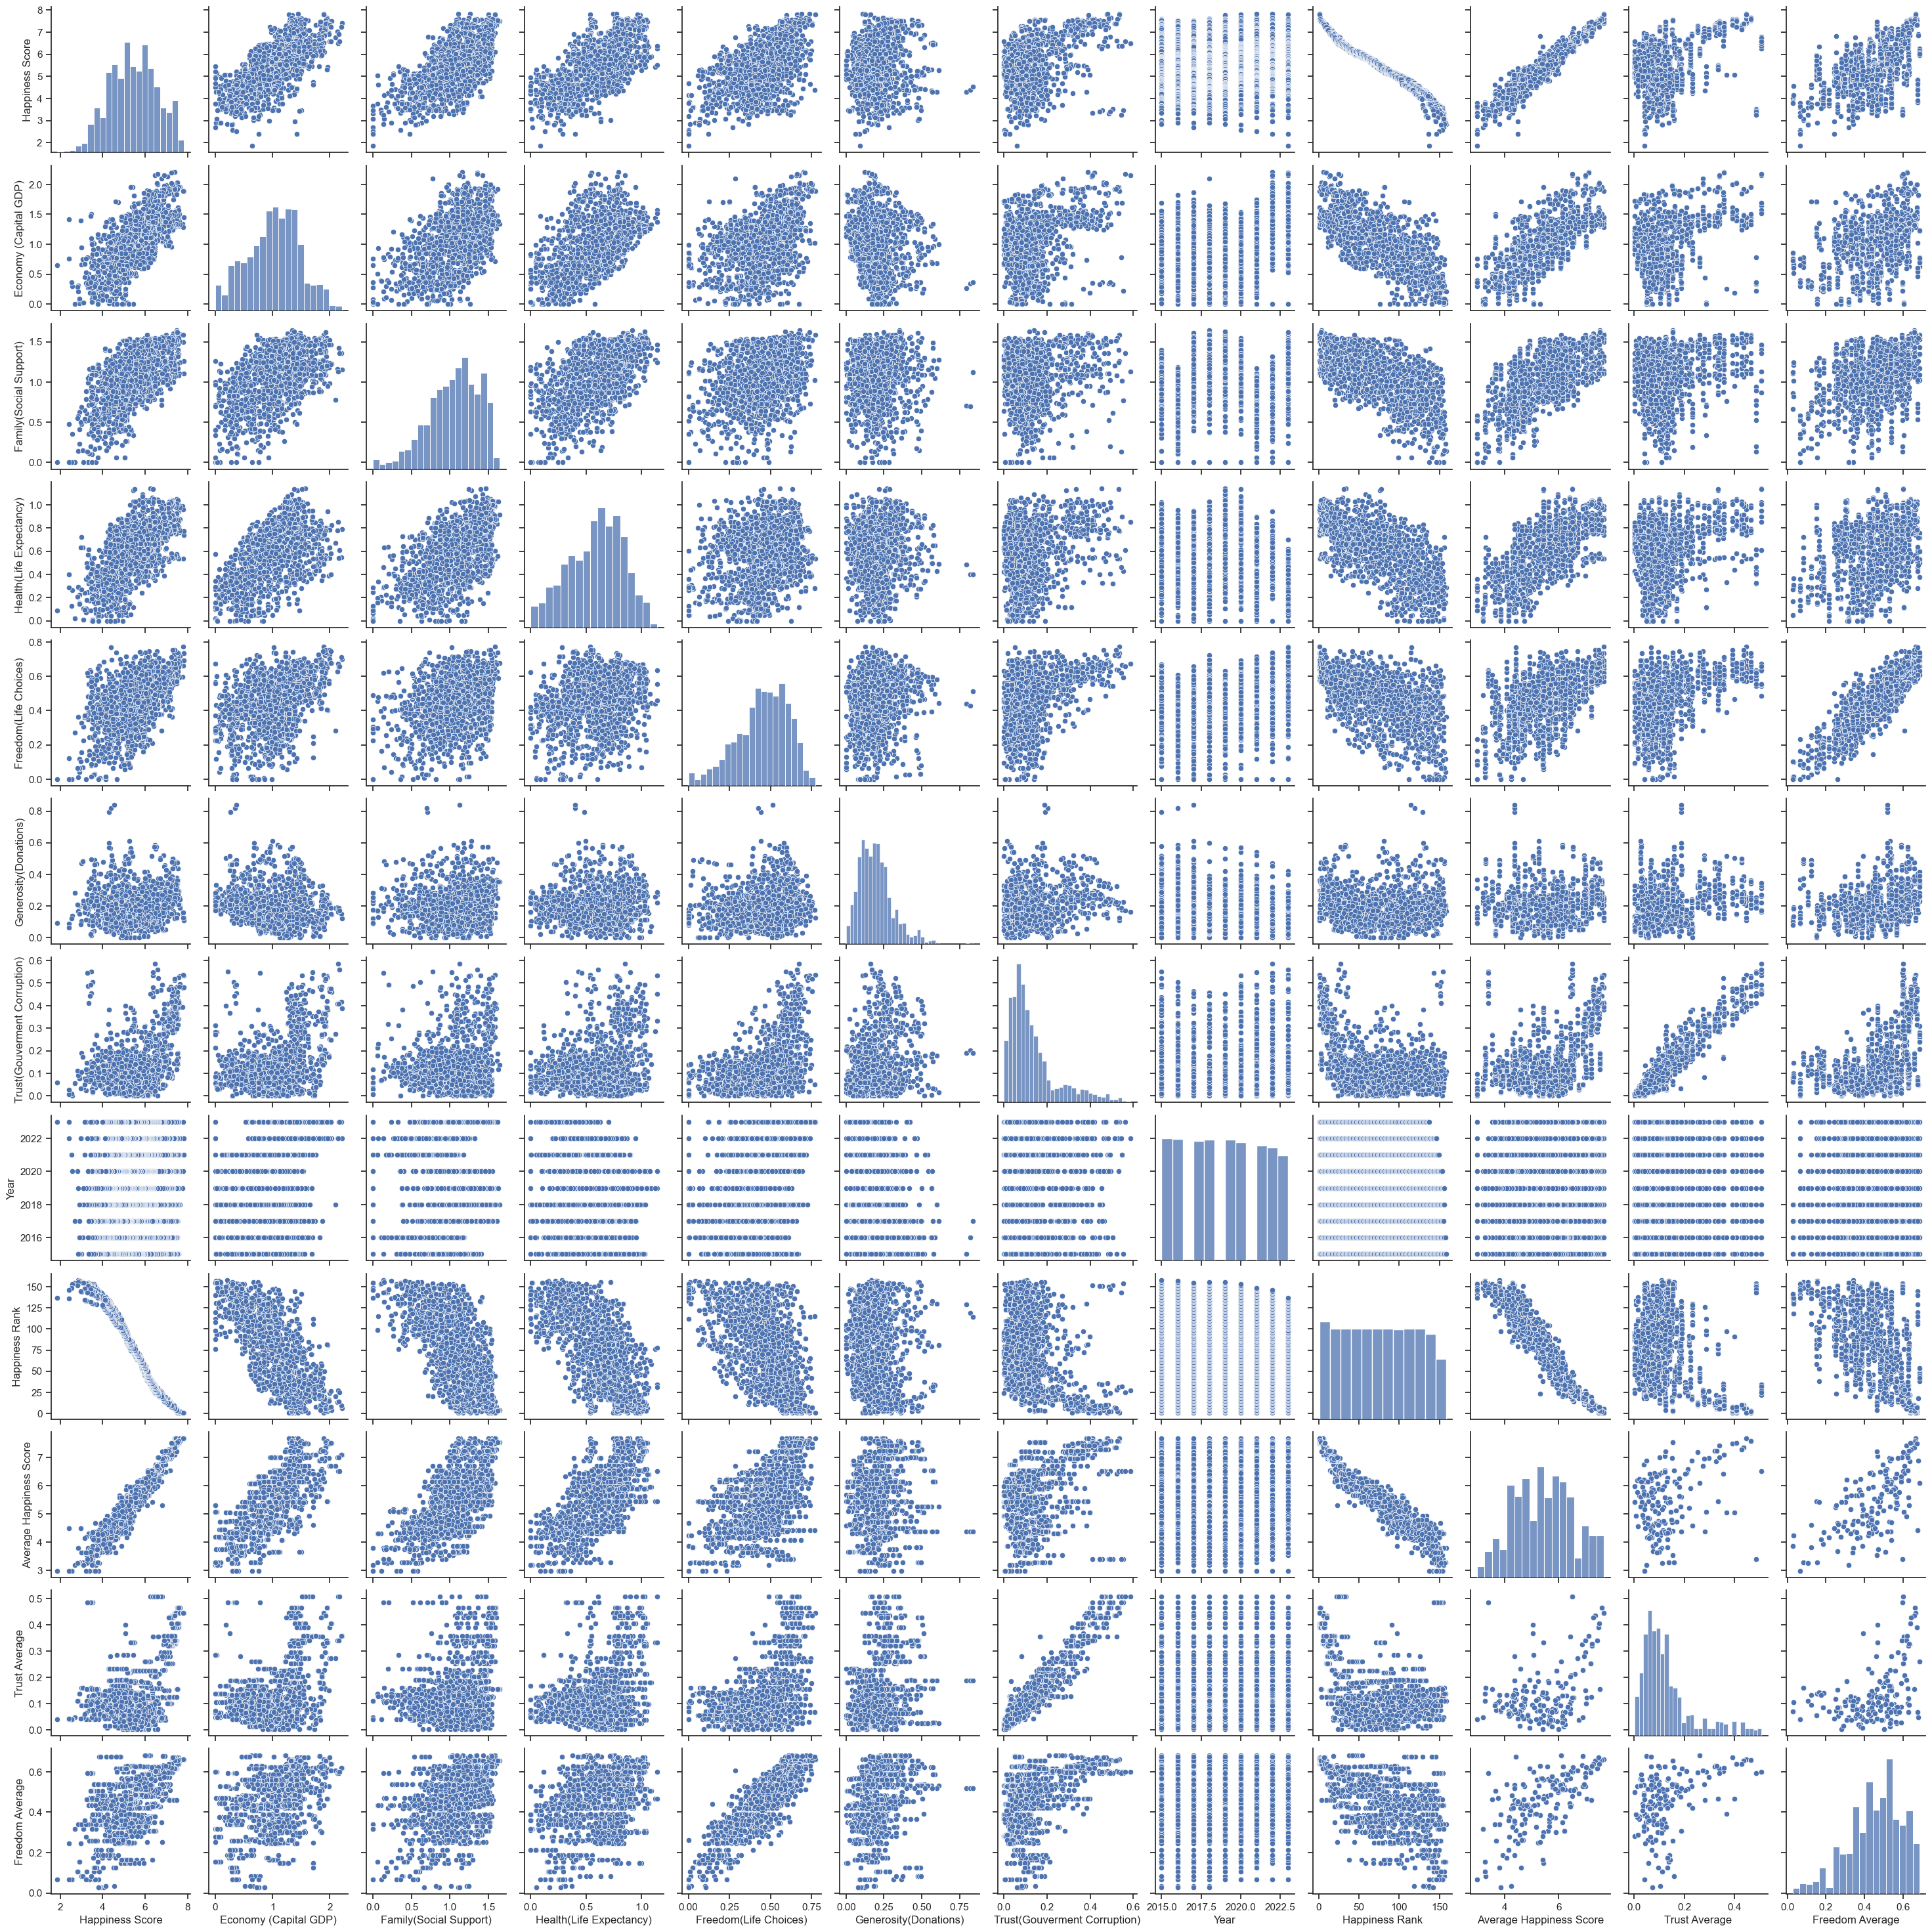

In [104]:
# Create a pair plot
g = sns.pairplot(df)
plt.savefig('pairplot_worst.png')

#### Relationship between happiness and the 6 factors

In [164]:
# Select numerical features from df
display(pd.DataFrame({"numerical columns":df._get_numeric_data().columns.tolist()}))

# list containing the 6 factors
l_factors = ['Health(Life Expectancy)', 'Economy (Capital GDP)', 'Family(Social Support)', 'Freedom(Life Choices)', 'Generosity(Donations)', 'Trust(Gouverment Corruption)']

numerical columns
0                Happiness Score
1          Economy (Capital GDP)
2         Family(Social Support)
3        Health(Life Expectancy)
4          Freedom(Life Choices)
5          Generosity(Donations)
6   Trust(Gouverment Corruption)
7                           Year
8                 Happiness Rank
9        Average Happiness Score
10                 Trust Average
11               Freedom Average

<Axes: >

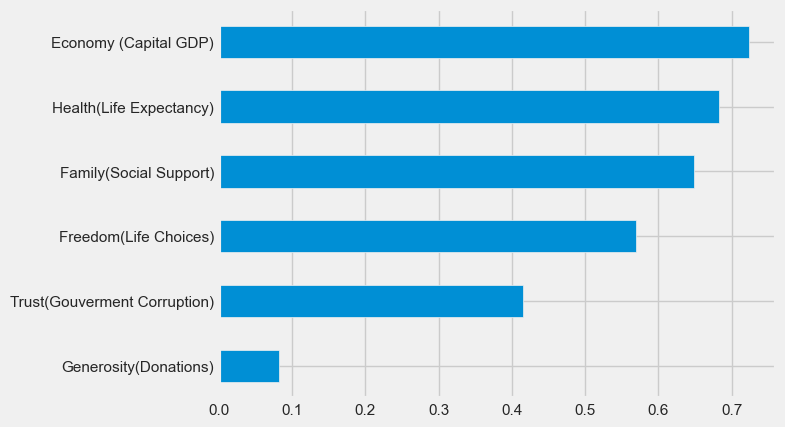

In [165]:
corr_matrix=df[["Happiness Score"]+l_factors].corr()
target_corr = corr_matrix["Happiness Score"].drop(['Happiness Score'])
target_corr.sort_values(ascending=True).plot(kind='barh')

This graph shows different degrees of correlations between `Happiness Score` and the 6 factors:
* `Economy (Capital GDP)` and `Health(Life Expectancy)` have **strong correlation (>0.7)**
* `Family(Social Support)`, `Freedom(Life Choices)` and `Trust(Gouverment Corruption)` have **average correlation ([0.3 - 0.7])**
* `Generosity(Donations)` has **weak correlation (<0.3)**

Let's try to have a better understand of the strongest relationships:

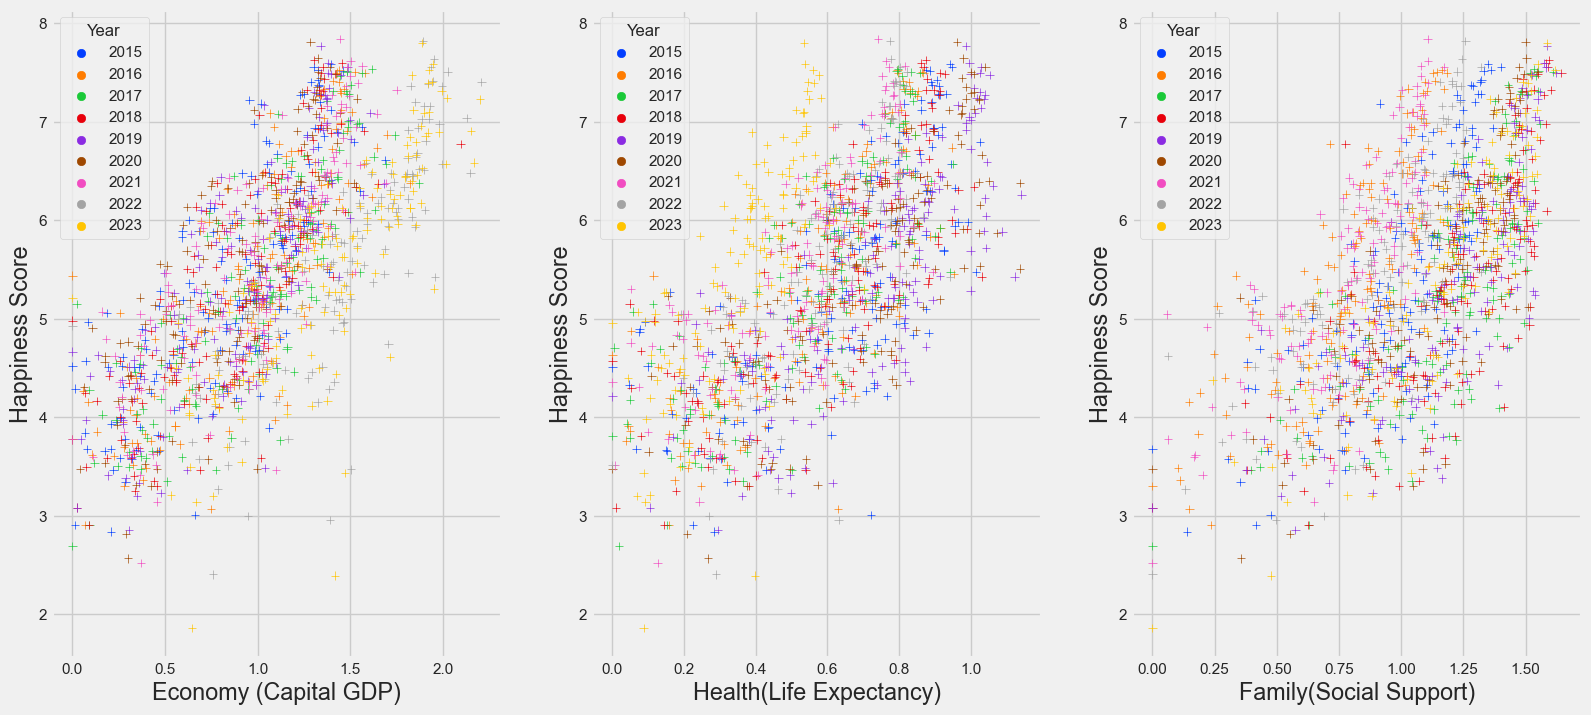

In [194]:
# Histogram
plt.figure(figsize=(30,8))
df["Year"] = df["Year"].apply(lambda x: str(x))

i = 151 # subplot initial position
for factor in ['Economy (Capital GDP)', 'Health(Life Expectancy)', 'Family(Social Support)']:
    plt.subplot(i)
    #plt.scatter(df['happiness_score'], df[factor], c = 'year')
    sns.set_palette("bright")
    plot = sns.scatterplot(x=factor, y='Happiness Score', data=df, marker='+', hue="Year")
    i+=1
plt.savefig(os.path.join(path1, 'Year_Happ'),bbox_inches='tight', pad_inches=0.1)

* `Economy (Capital GDP)` and `Health(Life Expectancy)` have the most impact on `Happiness Score`, while `Generosity(Donations)` has a very low impact.
* We can assume that the relationshp between `Happiness Score` and the the 3 most correlated factors (`Economy (Capital GDP)`, `Health(Life Expectancy)` and `Family(Social Support)`) is linear

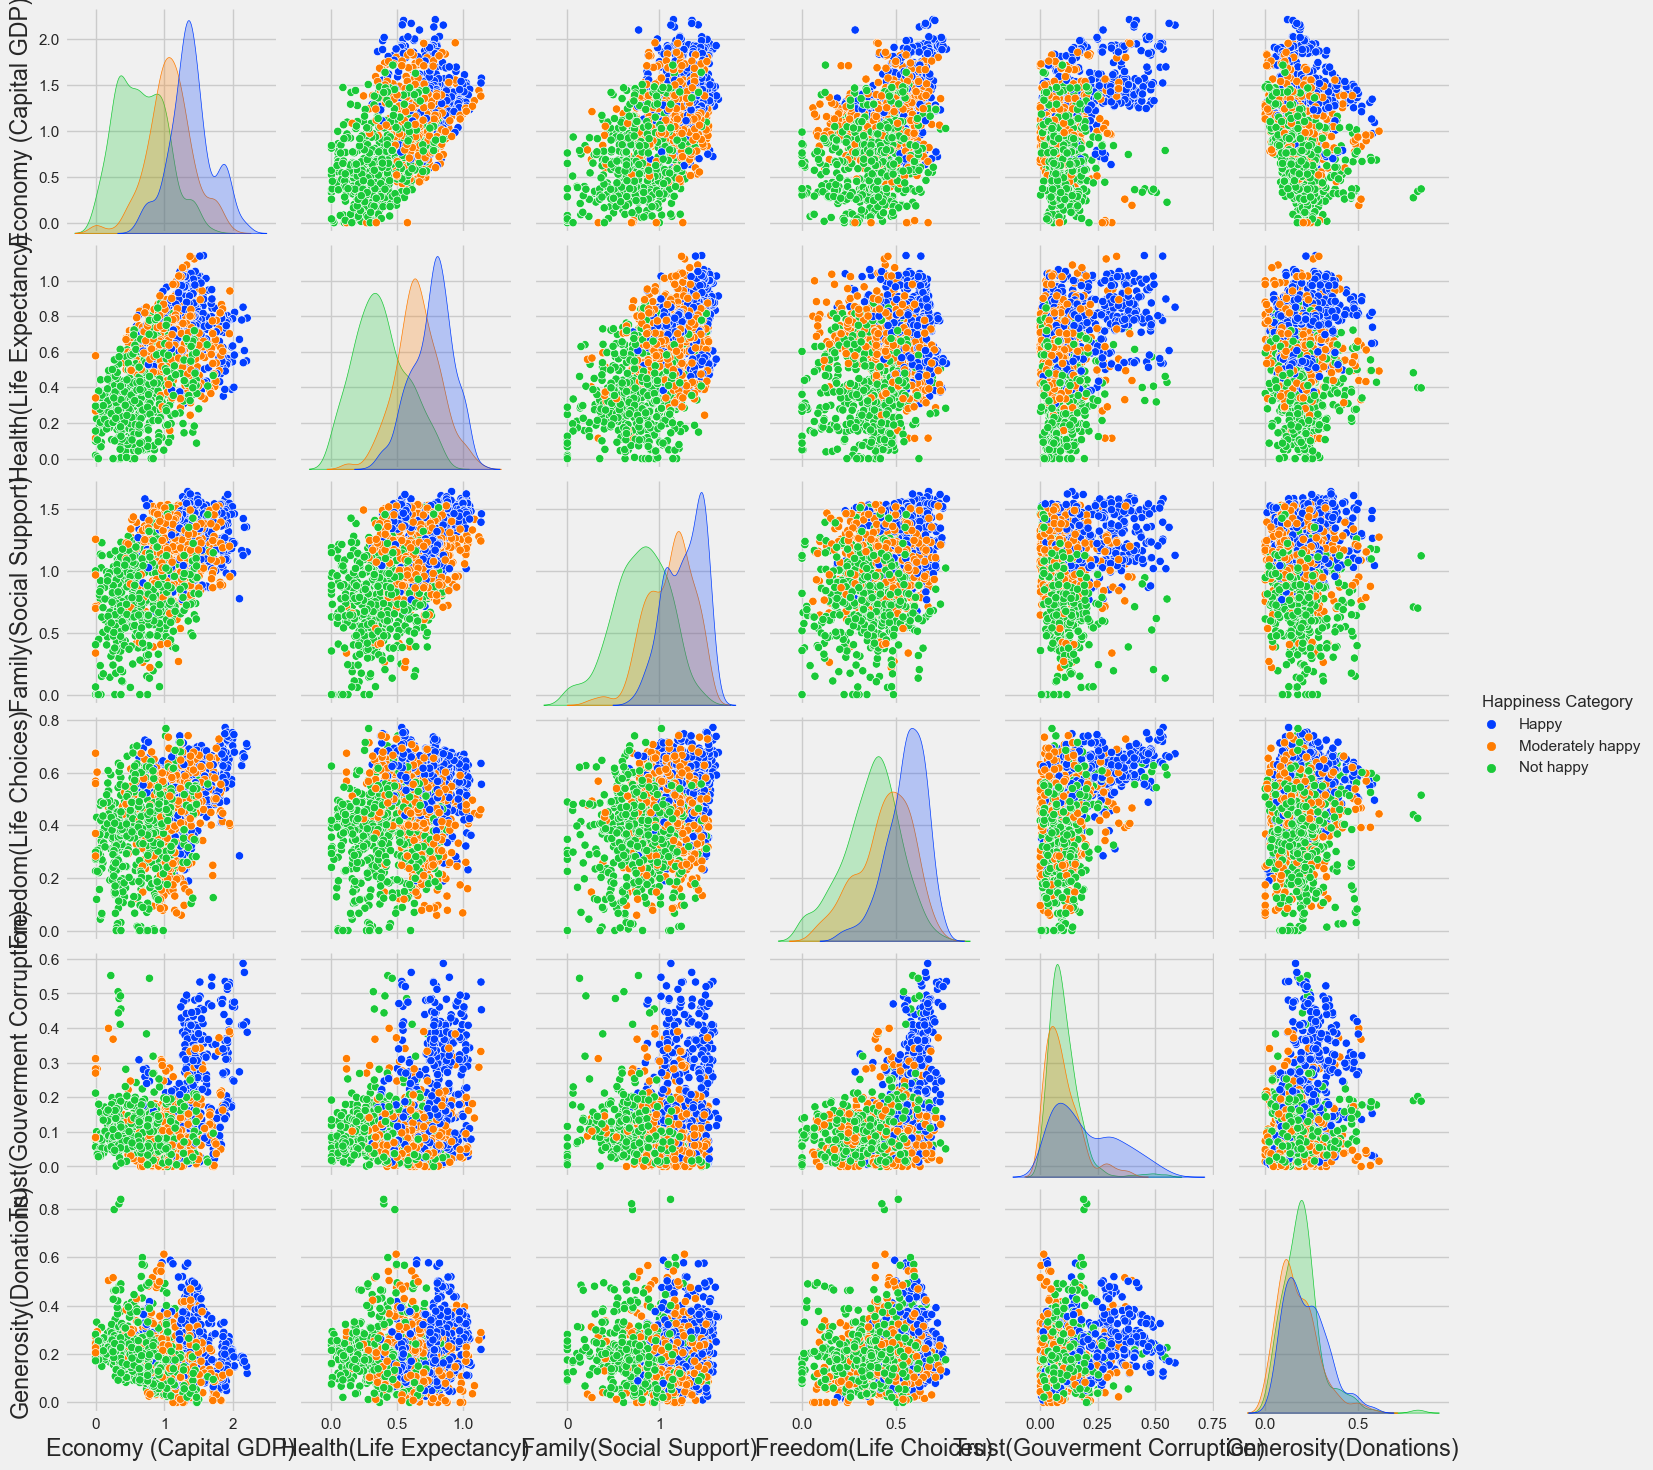

In [195]:
sns.pairplot(df[['Economy (Capital GDP)', 'Health(Life Expectancy)', 'Family(Social Support)','Freedom(Life Choices)','Trust(Gouverment Corruption)','Generosity(Donations)', 'Happiness Category']],
             hue="Happiness Category")
plt.savefig('pairplot.png')

Observations:  
* `Economy (Capital GDP)` has a linear relationship with `Health(Life Expectancy)`.
* Looking at the `Trust(Gouverment Corruption)` graphs, we can observe that when this feature is above a certain threshold (around 60), the countries tend to be in the top happiness quartile, even if the other factors are low. 

#### Separate Relationships

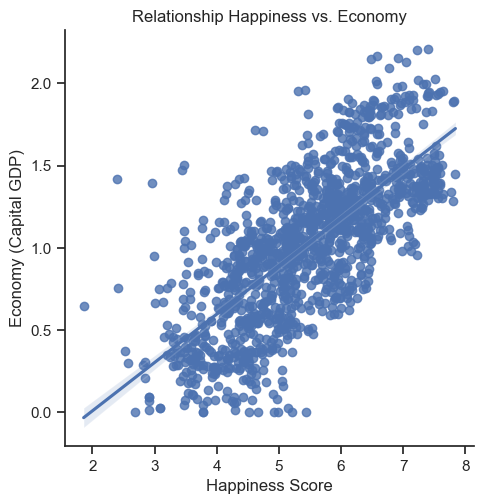

In [106]:
    # Create a scatterplot for the Happiness and Economy in seaborn
sns.lmplot(x = 'Happiness Score', y = 'Economy (Capital GDP)', data = df)
plt.title('Relationship Happiness vs. Economy')
plt.savefig(os.path.join(path1, 'Scatter_Happiness_GDPperCapital'),bbox_inches='tight', pad_inches=0.1)

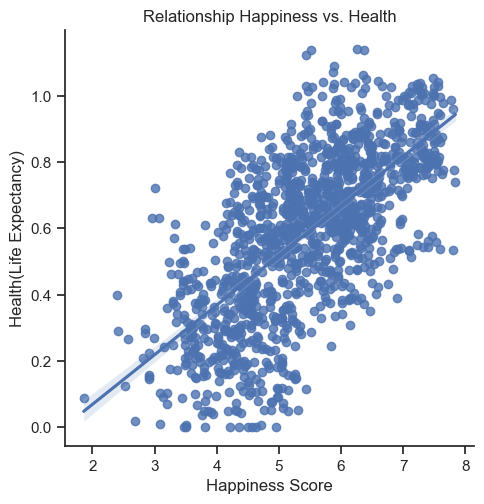

In [108]:
# Create a scatterplot for the Happiness and Health in seaborn
sns.lmplot(x = 'Happiness Score', y = 'Health(Life Expectancy)', data = df)
plt.title('Relationship Happiness vs. Health')
plt.savefig(os.path.join(path1, 'Scatter_Happiness_HealthyLife'),bbox_inches='tight', pad_inches=0.1)

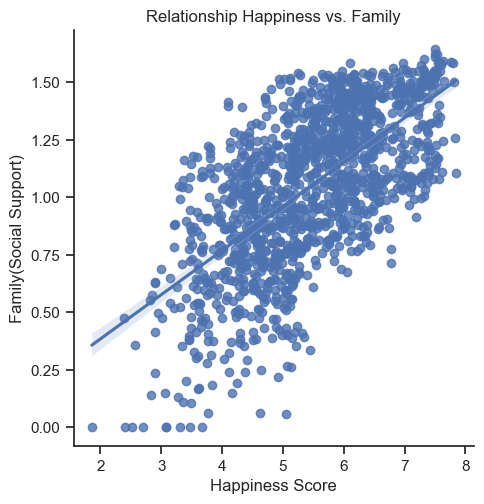

In [109]:
# Create a scatterplot for Happiness and Family in seaborn
sns.lmplot(x = 'Happiness Score', y = 'Family(Social Support)', data = df)
plt.title('Relationship Happiness vs. Family')
plt.savefig(os.path.join(path1, 'Scatter_Happiness_SocialSupport'),bbox_inches='tight', pad_inches=0.1)

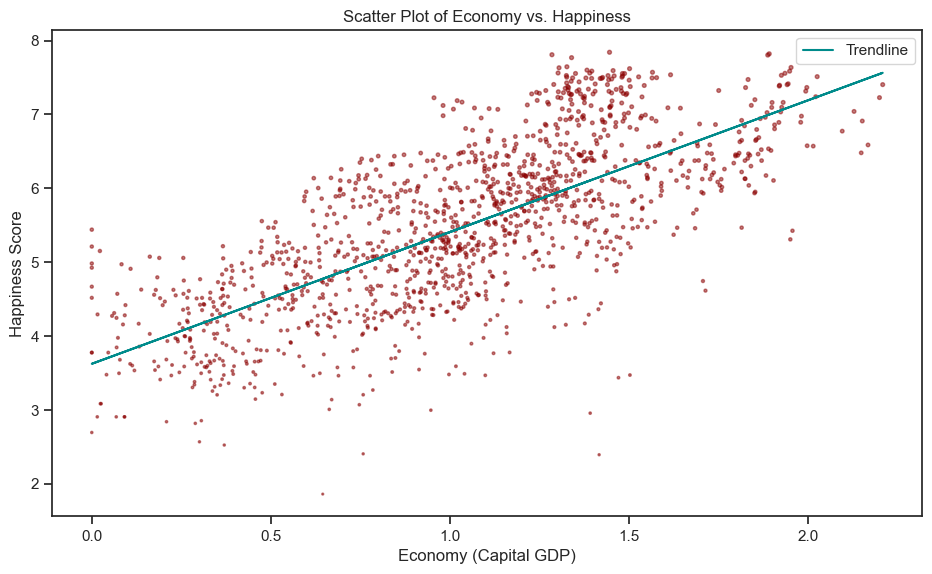

In [111]:
# Data
xpoints = np.array(df['Economy (Capital GDP)'])
ypoints = np.array(df['Happiness Score'])
sizes = np.array(df['Happiness Score'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(xpoints, ypoints, c='darkred', s=sizes, alpha=0.5)

# Fit a trendline (regression line)
z = np.polyfit(xpoints, ypoints, 1)
p = np.poly1d(z)
plt.plot(xpoints, p(xpoints), '#008B8B', label='Trendline')

# Set x-axis and y-axis labels
plt.xlabel('Economy (Capital GDP)')
plt.ylabel('Happiness Score')

# Set title
plt.title('Scatter Plot of Economy vs. Happiness')

# Add a legend
plt.legend()

# Save the figure
plt.savefig(os.path.join(path1, 'scatterplot_Economy.png'),bbox_inches='tight', pad_inches=0.1)

plt.show()

**Key Insights**  
For the least happy regions, Economy and Health are two biggest factores for happiness.  
Trust of the government is overall very low.  
Close to no relationship between generocity and economy, which means just because the economy is better, it does not afford people to feel generous.  
**Key Differences between Top 3 Happy Regions and Top 3 Least Happy Regions**  
While Happy Regions valued trust in the government and freedom in order to feel happy, economy and health are the two biggest concerns for Least Happy Regions.

#### Trust in the government

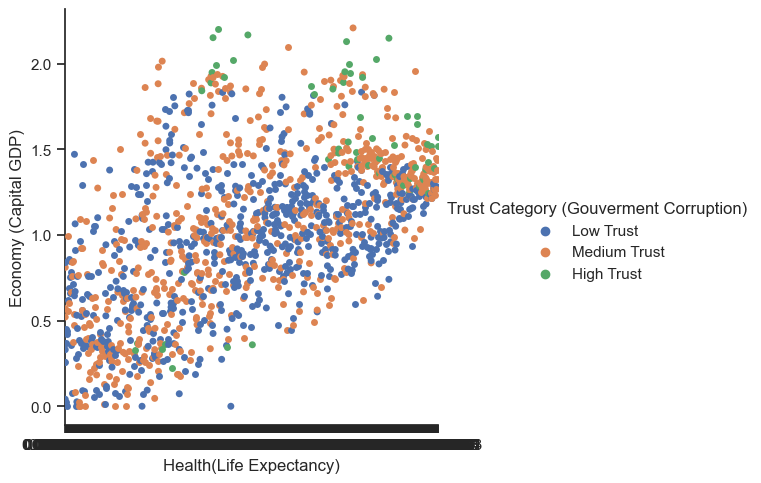

In [113]:
# Create a categorical plot in seaborn using the Goverment Categories
sns.set(style= 'ticks')
cat_plt = sns.catplot(x= 'Health(Life Expectancy)', y= 'Economy (Capital GDP)', hue= 'Trust Category (Gouverment Corruption)', data = df)
plt.savefig(os.path.join(path1, 'trustGov.png'),bbox_inches='tight', pad_inches=0.1)

In [69]:
# Aggregate the average of Happiness Score for all countries and derive a new variable 'Trust Average'
df['Trust Average'] = df.groupby(['Country'])['Trust(Gouverment Corruption)'].transform(np.average)

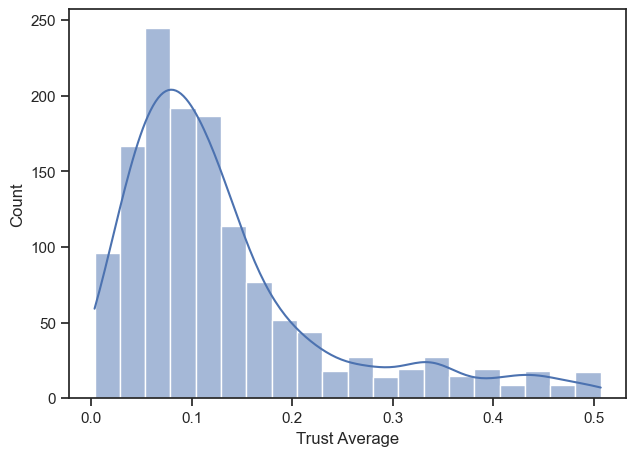

In [71]:
#extreme value checks
sns.histplot(df['Trust Average'], bins=20, kde = True) # shows extreme values for 'Trust Average'
plt.savefig(os.path.join(path1, 'trustGovAvg.png'),bbox_inches='tight', pad_inches=0.1)

#### Freedom of life choices

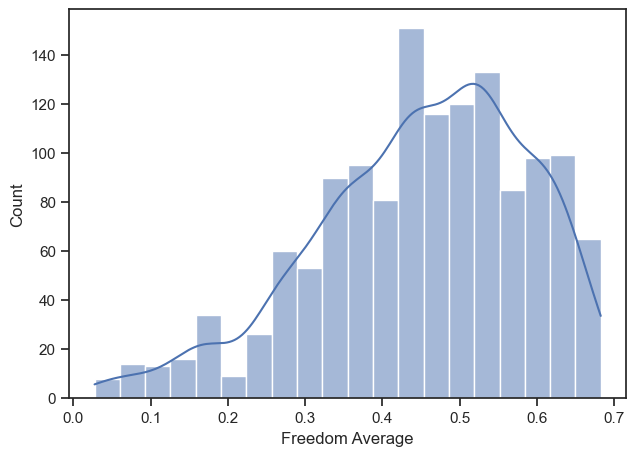

In [74]:
#extreme value checks
sns.histplot(df['Freedom Average'], bins=20, kde = True) # shows extreme values for 'Freedom Average'
plt.savefig(os.path.join(path1, 'Freedom.png'),bbox_inches='tight', pad_inches=0.1)

**Key Findings**  
In our previous data exploration, we identified the Top 3 Happy and Least Happy regions based on the Happiness Score. Our exploration of the Top 3 Happy Regions led us to formulate the following:  
- Countries are more likely to experience happiness when there is a high level of trust in the government and when individuals have the freedom to make life choices.  
Analyzing data, we can draw several key observations:  
- The Western Europe region, particularly Nordic countries, consistently achieve higher average happiness scores and maintain relatively high levels of government trust and freedom in life choices.  
- In Latin American regions, which is also included in our Top 3 Happy Region, despite relatively low trust scores, there is a relatively high average happiness score. This raises questions about the factors contributing to happiness in these areas.  
- The average score of freedom varies more widely in frequency than anticipated. This suggests that while freedom may be a significant factor for selected countries, it may not have the same impact on happiness for all nations.

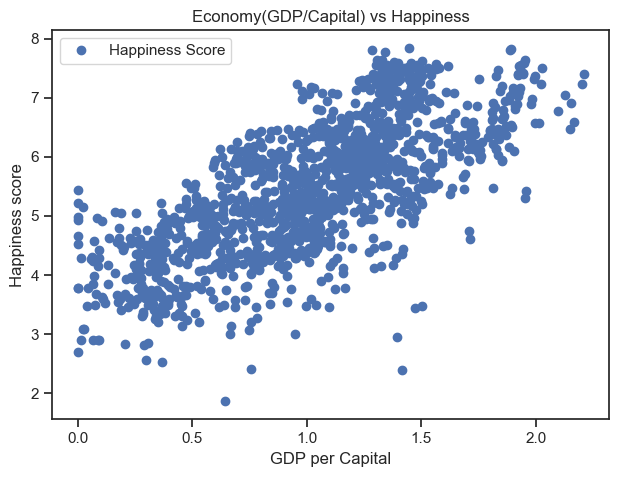

<Figure size 640x480 with 0 Axes>

In [115]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other
df.plot(x = 'Economy (Capital GDP)', y = 'Happiness Score',style = 'o') 
plt.title('Economy(GDP/Capital) vs Happiness')  
plt.xlabel('GDP per Capital')  
plt.ylabel('Happiness score')  
plt.show()
plt.savefig(os.path.join(path1, 'GDP_Happiness.png'),bbox_inches='tight', pad_inches=0.1)

NOTE: Countries with higher GDP per capital are likely to have higher happiness scores, suggesting that economic well-being is a significant predictor of happiness.

In [85]:
# Change column names for consistency
df = df.rename(columns={'country': 'Country', 'region': 'Region', 'happiness_score': 'Happiness Score', 'gdp_per_capita': 'Economy (Capital GDP)', 'social_support': 'Family(Social Support)', 'healthy_life_expectancy': 'Health(Life Expectancy)', 'freedom_to_make_life_choices': 'Freedom(Life Choices)', 'generosity': 'Generosity(Donations)', 'corruption_perceptions': 'Trust(Gouverment Corruption)', 'year': 'Year', 'happiness_rank': 'Happiness Rank', 'avg_happiness_score': 'Average Happiness Score', 'happiness_category': 'Happiness Category', 'trust_goverment_category': 'Trust Category (Gouverment Corruption)'})

In [86]:
df.head(5)

Country                 Region  Happiness Score  Economy (Capital GDP)  \
0  Switzerland         Western Europe            7.587                1.39651   
1      Iceland         Western Europe            7.561                1.30232   
2      Denmark         Western Europe            7.527                1.32548   
3       Norway         Western Europe            7.522                1.45900   
4       Canada  North America and ANZ            7.427                1.32629   

   Family(Social Support)  Health(Life Expectancy)  Freedom(Life Choices)  \
0                 1.34951                  0.94143                0.66557   
1                 1.40223                  0.94784                0.62877   
2                 1.36058                  0.87464                0.64938   
3                 1.33095                  0.88521                0.66973   
4                 1.32261                  0.90563                0.63297   

   Generosity(Donations)  Trust(Gouverment Corruption)  Year  Happiness Rank  \
0                0.29678                       0.41978  2015               1   
1                0.43630                       0.14145  2015               2   
2                0.34139                       0.48357  2015               3   
3                0.34699                       0.36503  2015               4   
4                0.45811                       0.32957  2015               5   

   Average Happiness Score Happiness Category  \
0                 7.493322              Happy   
1                 7.522278              Happy   
2                 7.579733              Happy   
3                 7.473889              Happy   
4                 7.230456              Happy   

  Trust Category (Gouverment Corruption)  Trust Average  Freedom Average  
0                             High Trust       0.406196         0.637796  
1                           Medium Trust       0.154807         0.656239  
2                             High Trust       0.464903         0.659315  
3                           Medium Trust       0.390873         0.671494  
4                           Medium Trust       0.327548         0.629089

In [87]:
# describe the data
df.describe()

Happiness Score  Economy (Capital GDP)  Family(Social Support)  \
count      1366.000000            1366.000000             1366.000000   
mean          5.441476               1.019331                1.045141   
std           1.118226               0.453856                0.331207   
min           1.859000               0.000000                0.000000   
25%           4.597750               0.696163                0.832011   
50%           5.448100               1.042000                1.082840   
75%           6.256950               1.338710                1.299028   
max           7.842000               2.209000                1.644000   

       Health(Life Expectancy)  Freedom(Life Choices)  Generosity(Donations)  \
count              1366.000000            1366.000000            1366.000000   
mean                  0.584043               0.450797               0.196356   
std                   0.245117               0.156787               0.113287   
min                   0.000000               0.000000               0.000000   
25%                   0.402301               0.356000               0.115002   
50%                   0.612830               0.467672               0.182825   
75%                   0.777614               0.568842               0.252909   
max                   1.141000               0.772000               0.838075   

       Trust(Gouverment Corruption)         Year  Happiness Rank  \
count                   1366.000000  1366.000000     1366.000000   
mean                       0.132426  2018.900439       76.564422   
std                        0.112606     2.559541       44.100799   
min                        0.000000  2015.000000        1.000000   
25%                        0.056826  2017.000000       38.250000   
50%                        0.097095  2019.000000       76.000000   
75%                        0.166750  2021.000000      114.000000   
max                        0.587000  2023.000000      158.000000   

       Average Happiness Score  Trust Average  Freedom Average  
count              1366.000000    1366.000000      1366.000000  
mean                  5.441476       0.132426         0.450797  
std                   1.079781       0.106682         0.138596  
min                   2.990767       0.003160         0.027433  
25%                   4.627022       0.063899         0.360664  
50%                   5.431000       0.099401         0.467355  
75%                   6.199529       0.158703         0.558373  
max                   7.662744       0.507160         0.682801

#### Happiness Map

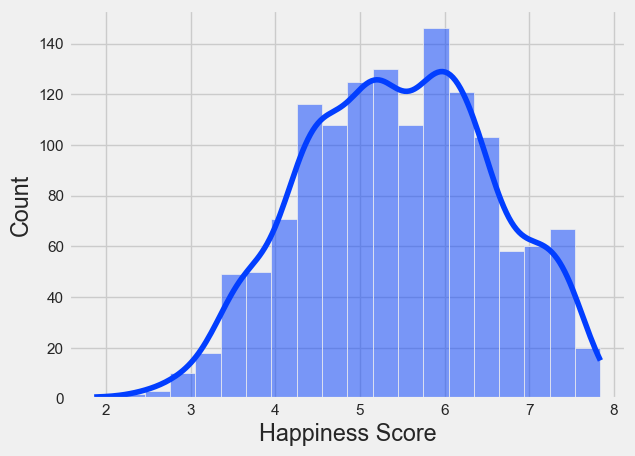

In [199]:
#extreme value checks
sns.histplot(df['Happiness Score'], bins=20, kde = True) # shows extreme values '
plt.savefig(os.path.join(path1, 'Hist_HappineSs.png'),bbox_inches='tight', pad_inches=0.1)

In [120]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Create a choropleth map
folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['Country', 'Happiness Score'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'RdYlGn', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Happiness around the World").add_to(map)
folium.LayerControl().add_to(map)

map

#### Trust Gouverment Map

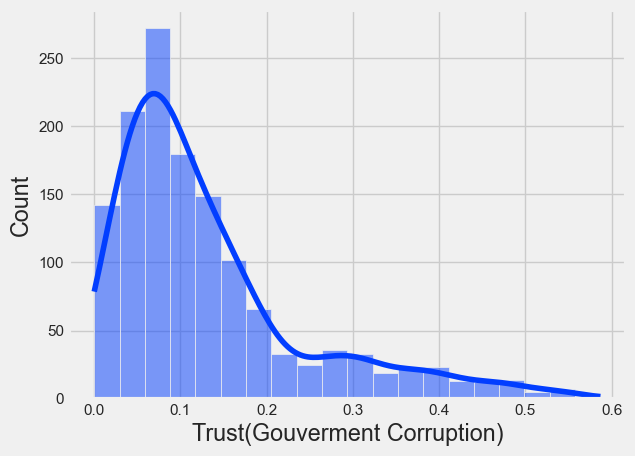

In [198]:
#extreme value checks
sns.histplot(df['Trust(Gouverment Corruption)'], bins=20, kde = True) # shows extreme values
plt.savefig(os.path.join(path1, 'Hist_Corruption.png'),bbox_inches='tight', pad_inches=0.1)

In [121]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['Country', 'Trust Average'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'BuGn', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

#### Freedom of life choices map

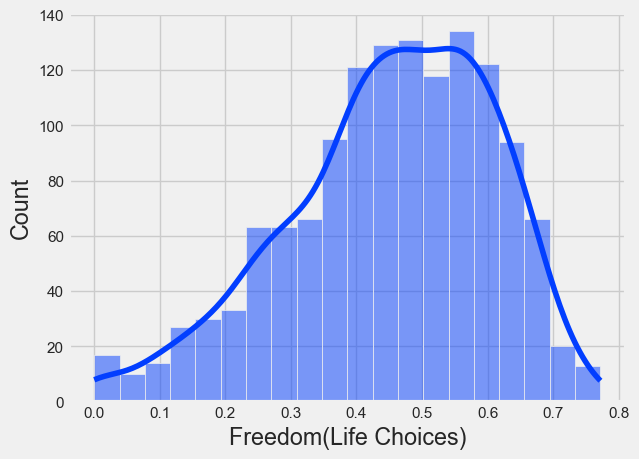

In [197]:
#extreme value checks
sns.histplot(df['Freedom(Life Choices)'], bins=20, kde = True) # shows extreme values
plt.savefig(os.path.join(path1, 'Hist_Freedom.png'),bbox_inches='tight', pad_inches=0.1)

In [132]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['Country', 'Freedom(Life Choices)'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'Blues', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

#### Family(Social Support) map

In [ ]:
#extreme value checks
sns.histplot(df['Family(Social Support)], bins=20, kde = True) # shows extreme values

In [137]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['Country', 'Family(Social Support)'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

#### Health(Life Expectancy) map

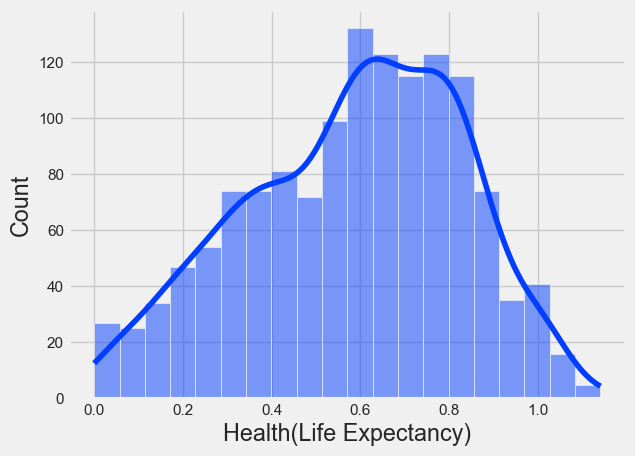

In [196]:
#extreme value checks
sns.histplot(df['Health(Life Expectancy)'], bins=20, kde = True) # shows extreme values
plt.savefig(os.path.join(path1, 'Hist_Health.png'),bbox_inches='tight', pad_inches=0.1)

In [136]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = df,
    columns = ['Country', 'Health(Life Expectancy)'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'Reds', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

In [88]:
# Export data
df.to_csv(os.path.join(path, '2015-2023Last.csv'))

### [Back to TOP](#INDEX)